# Bike Sharing Demand Prediction

# CMPE 257: Machine Learning

## ***Team Spartans:***

**- Pramatha Nadig (016708588)**

**- Jack Kalavadia (016197519)**

**- Rutvik Moradiya (016656367)**

**- Rishikesh Andhare (061726203)**


## Introduction

Bike sharing systems have gained immense popularity in urban settings, offering a convenient and eco-friendly transportation alternative. These modern bike rentals have automated the entire process—from membership and rental to return—allowing users to easily rent a bike from one location and return it to another. Given the increasing role of bike-sharing systems in addressing traffic congestion, environmental concerns, and public health, predicting bike demand has become crucial for effective city planning.

The dataset used in this notebook spans from 2011 to 2012 and captures the bike-sharing demand in the Capital bike share system. It includes the hourly and daily count of rental bikes, along with various weather conditions and seasonal information.

### Dataset Attributes

- **instant**: Record index
- **dteday**: Date
- **season**: Season (1: winter, 2: spring, 3: summer, 4: fall)
- **yr**: Year (0: 2011, 1: 2012)
- **mnth**: Month (1 to 12)
- **hr**: Hour (0 to 23)
- **holiday**: Whether the day is a holiday or not
- **weekday**: Day of the week
- **workingday**: 1 if the day is neither a weekend nor a holiday, otherwise 0
- **weathersit**: Weather situation
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius
- **atemp**: Normalized feeling temperature in Celsius
- **hum**: Normalized humidity
- **windspeed**: Normalized wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Total count of rental bikes (casual + registered)

## Data Exploration

Before diving into building predictive models, it's essential to understand the dataset's characteristics. We'll look into its dimensions, statistics, and potential correlations among variables.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd


In [27]:
# Reading the data
# https://drive.google.com/drive/folders/1g18lFyTOq4tUOwuue1t13OwB__oCP3fC
data = pd.read_csv('https://raw.githubusercontent.com/jackkalavadia/CMPE-257/main/bike_rental.csv.csv', index_col=0)

# Data Sets
1) Wiki sources: https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems#cite_note-13

2) https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

3) https://bikeshare.metro.net/wp-content/uploads/2023/01/metro-trips-2022-q4.zip

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems#cite_note-13'
tables = pd.read_html(url)

# Assuming the first table is the one you want
df = tables[0]

# Save to CSV
df.to_csv('wiki_bike_sharing_scraped.csv', index=False)

# Bussiness Task



1.   One of the challenges these businesses have is figuring out how many bikes to station at different locations at different times in order to optimize profit and offer rides to clients. These bikes occasionally go unclaimed because they are not available. However, there are times when there is less demand for these motorcycles, which results in their widespread but unused availability. It becomes essential to handle these circumstances and appreciate the desire for motorcycles on various days and in various circumstances.

2.   The current market crisis has caused a sharp decline in US bike sharing's revenue recently. As a result, many bicycle rental firms are struggling to survive in the current market. It has consequently made the deliberate choice to develop a business plan that would aid it in boosting revenue as soon as the economy and market conditions are stable once more. They also want to expand their business outside of the US. They therefore require their potential partners to forecast the number of bikes that customers will hire in various scenarios.






# ML Task

*   Data visualizations, Fractal Clustering, Gradient Boosting Decision Regressor and Deep Neural Networks






**Exploratory Data Analysis (EDA)** was conducted to foster a comprehensive comprehension of various features and their respective impact on the output variable.

In [7]:
data.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [9]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
# Check for missing values in the dataset
data.isnull().sum()


dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Print all column names
data.columns


Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Drop  steday, registered, casual columns
data.drop(['dteday', 'casual', 'registered'], axis=1, inplace=True)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [13]:
# View info on column yr
data['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [14]:
# Calculate total cnt where year is 0 and 1
data.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(data[['temp', 'atemp', 'hum', 'windspeed']])

In [16]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# SSE and Silhouette

In [17]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

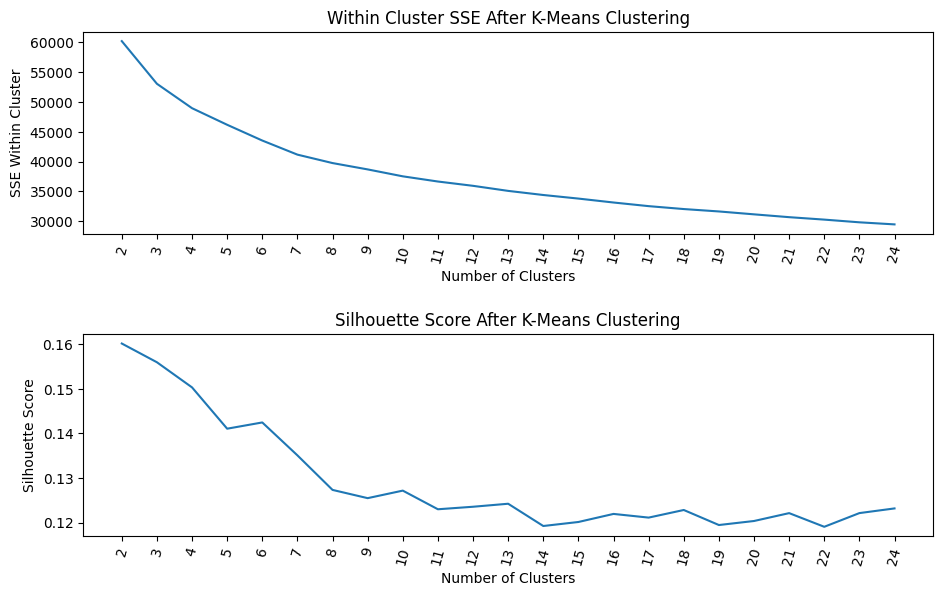

In [18]:
plot_cluster(data, max_loop=25)

## Applying K-Means with the optimal number of clusters identified

In [19]:
def apply_cluster(df, clusters=2):

    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))

    # Plot the clusters
    _ = plt.figure(figsize=(10,6))
    _ = sns.scatterplot(x='temp', y='cnt', hue='cluster', data=df)
    _ = plt.xlabel("Temperature")
    _ = plt.ylabel("Count")
    _ = plt.title("Bike Sharing Count by Temperature")
    plt.show()


    return df

clustering performance
-----------------------------------
silhouette score: 0.12
sse withing cluster: 34394


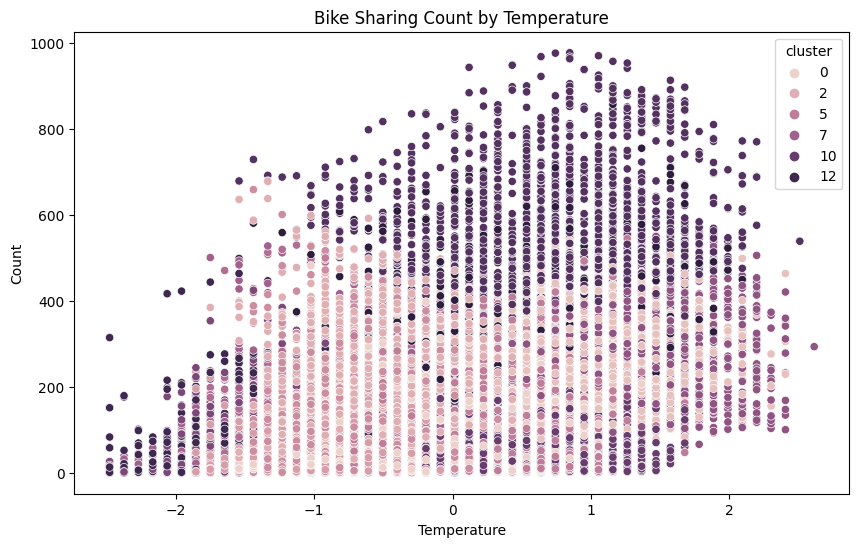

In [20]:
first = apply_cluster(data, clusters=14)

In [21]:
data_sub = data.query("cluster==0").reset_index(drop=True)

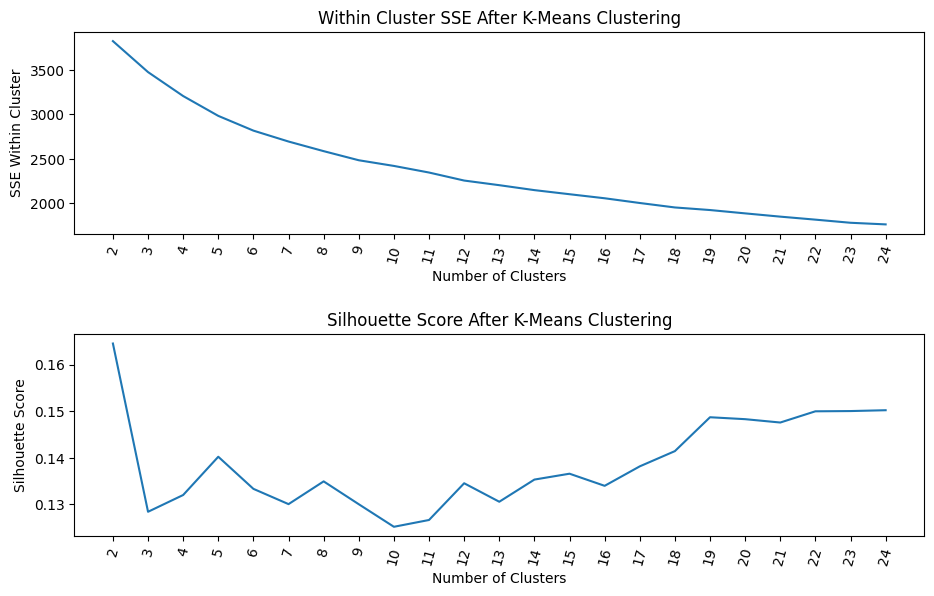

In [22]:
plot_cluster(data_sub, max_loop=25)

clustering performance
-----------------------------------
silhouette score: 0.13
sse withing cluster: 3474


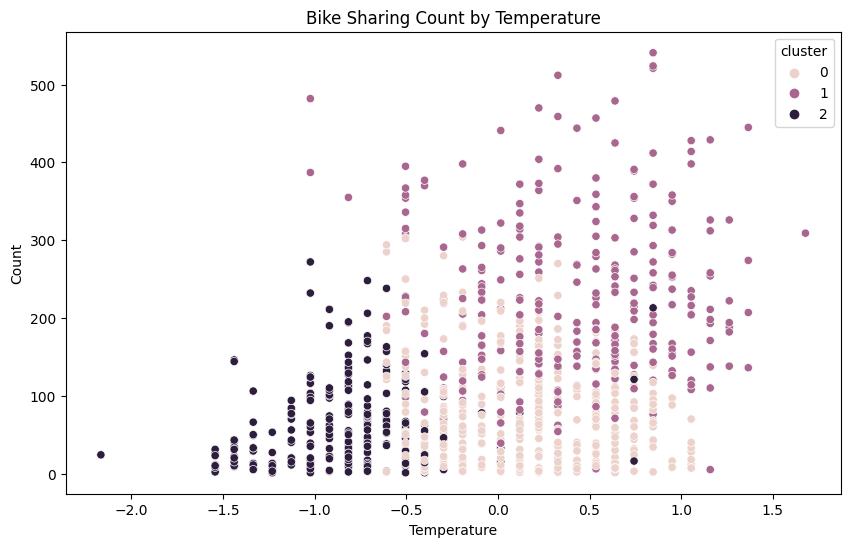

In [23]:
second = apply_cluster(data_sub, clusters=3)

In [24]:
data_sub_2 = data.query("cluster==2")

<ipython-input-17-d24b3f798be9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('cluster', axis=1, inplace=True)


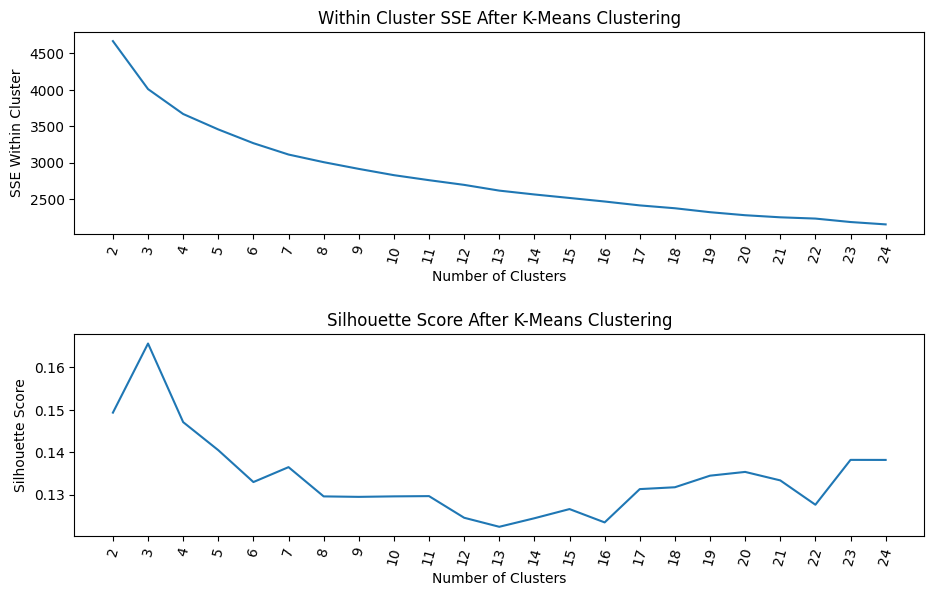

In [25]:
plot_cluster(data_sub_2, max_loop=25)

<ipython-input-19-bb0f51a6b8a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


clustering performance
-----------------------------------
silhouette score: 0.15
sse withing cluster: 4668


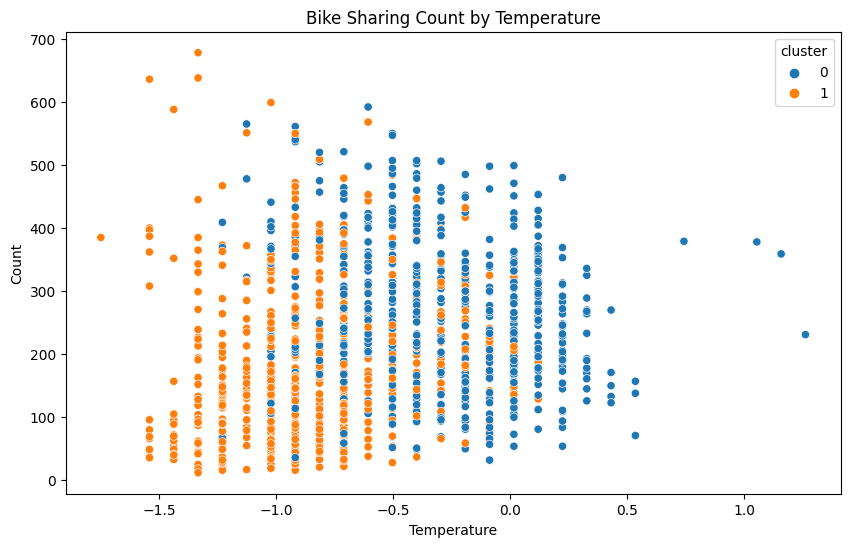

In [26]:
third = apply_cluster(data_sub_2, clusters=2)

From the above graphs 3 seems like a good score to select

### Conclusion

We tried predicting bike-sharing demand with a focus on resource optimization and strategic planning. A standout result from the project is the identification of "Cluster 3" as the golden cluster. This cluster likely represents optimal times and locations that are crucial for maximizing revenue and operational efficiency. However, the notebook falls short on detailing the machine learning models employed. The dataset used is comprehensive but dated, lacking consideration for current market fluctuations and operational constraints. Future iterations should focus on model transparency, updating the dataset, and factoring in external variables like market conditions. Overall, the project makes a promising start, and the identification of the golden cluster in Cluster 3 adds significant value to future strategic planning.
